In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Upload Dataset

In [94]:
data=pd.read_csv('diabetesdataset.csv')
data.sample(7)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
637,637,2,94,76,18,66,31.6,0.649,23,0
178,178,5,143,78,0,0,45.0,0.190,47,0
599,599,1,109,38,18,120,23.1,0.407,26,0
262,262,4,95,70,32,0,32.1,0.612,24,0
562,562,1,87,68,34,77,37.6,0.401,24,0
674,674,8,91,82,0,0,35.6,0.587,68,0
410,410,6,102,90,39,0,35.7,0.674,28,0


## Data Analysis

In [95]:
print("Number Of Rows",data.shape[0])
print("Number Of Columns",data.shape[1])
data.shape

Number Of Rows 768
Number Of Columns 10


(768, 10)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


In [97]:
data.describe()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [98]:
data.corr()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Unnamed: 0,1.000000,-0.037201,0.012994,0.020953,0.019006,0.001998,0.012320,-0.040326,0.007714,-0.045184
Pregnancies,-0.037201,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.012994,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.020953,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.019006,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,0.001998,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.012320,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.040326,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.007714,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,-0.045184,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Now Remove the unnecessary Columns

In [99]:
data.drop(['Unnamed: 0','Glucose', 'BloodPressure','BMI','SkinThickness'],axis=1,inplace=True)
data.sample(7)

,Pregnancies,Insulin,DiabetesPedigreeFunction,Age,Outcome
687,1,0,0.181,29,0
633,1,183,0.115,22,0
552,6,0,0.247,66,0
600,1,0,0.400,24,0
762,9,0,0.142,33,0
12,10,0,1.441,57,0
328,2,120,0.127,23,1


#### Now check the behaviour of the data outliers present or Not

In [100]:
data.skew()/len(data)*100

Pregnancies                 0.117405
Insulin                     0.295866
DiabetesPedigreeFunction    0.249988
Age                         0.147083
Outcome                     0.082684
dtype: float64

In [101]:
### now we can clearly see that outlier are present in a big amount so before train the model first remove the outliers

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


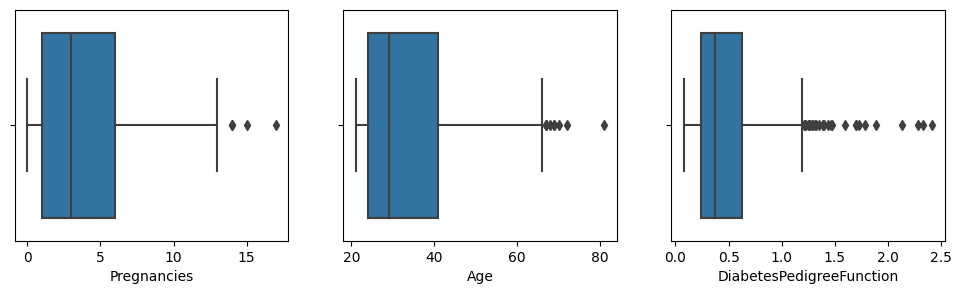

In [102]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3, figsize=(12,3))
sns.boxplot(data['Pregnancies'], ax=ax1)
sns.boxplot(data['Age'], ax=ax2)
sns.boxplot(data['DiabetesPedigreeFunction'], ax=ax3)
plt.show()

### Working to remove Outliers

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

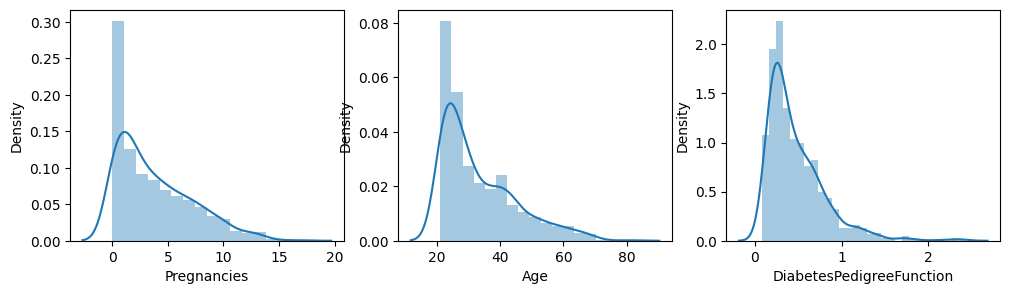

In [103]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3, figsize=(12,3))
sns.distplot(data['Pregnancies'], ax=ax1)
sns.distplot(data['Age'], ax=ax2)
sns.distplot(data['DiabetesPedigreeFunction'], ax=ax3)
plt.show()

In [104]:
#### Now we'll use IQR Method for remove outliers
data.columns


Index(['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')

In [105]:
percentile25_Pregnancies=data['Pregnancies'].quantile(0.25)
percentile75_Pregnancies=data['Pregnancies'].quantile(0.75)

percentile25_Insulin=data['Insulin'].quantile(0.25)
percentile75_Insulin=data['Insulin'].quantile(0.75)

percentile25_DiabetesPedigreeFunction=data['DiabetesPedigreeFunction'].quantile(0.25)
percentile75_DiabetesPedigreeFunction=data['DiabetesPedigreeFunction'].quantile(0.75)

percentile25_Age=data['Age'].quantile(0.25)
percentile75_Age=data['Age'].quantile(0.75)

In [106]:
iqr_Pregnancies=percentile75_Pregnancies - percentile25_Pregnancies
iqr_Insulin=percentile75_Insulin - percentile25_Insulin
iqr_DiabetesPedigreeFunction=percentile75_DiabetesPedigreeFunction - percentile25_DiabetesPedigreeFunction
iqr_Age = percentile75_Age - percentile25_Age

In [107]:
upper_limit_Pregnancies = percentile75_Pregnancies + 1.5 * iqr_Pregnancies
lower_limit_Pregnancies = percentile25_Pregnancies - 1.5 * iqr_Pregnancies

upper_limit_Insulin = percentile75_Insulin + 1.5 * iqr_Insulin
lower_limit_Insulin = percentile25_Insulin - 1.5 * iqr_Insulin

upper_limit_DiabetesPedigreeFunction = percentile75_DiabetesPedigreeFunction + 1.5 * iqr_DiabetesPedigreeFunction
lower_limit_DiabetesPedigreeFunction = percentile25_DiabetesPedigreeFunction - 1.5 * iqr_DiabetesPedigreeFunction

upper_limit_Age = percentile75_Age + 1.5 * iqr_Age
lower_limit_Age = percentile25_Age - 1.5 * iqr_Age

In [108]:
print("Upper limit_Pregnancies",upper_limit_Pregnancies)
print("Lower limit_Pregnancies",lower_limit_Pregnancies)

print("Upper limit_Insulin",upper_limit_Insulin)
print("Lower limit_Insulin",lower_limit_Insulin)

print("Upper limit_DiabetesPedigreeFunction",upper_limit_DiabetesPedigreeFunction)
print("Lower limit_DiabetesPedigreeFunction",lower_limit_DiabetesPedigreeFunction)

print("Upper limit_Age",upper_limit_Age)
print("Lower limit_Age",lower_limit_Age)

Upper limit_Pregnancies 13.5
Lower limit_Pregnancies -6.5
Upper limit_Insulin 318.125
Lower limit_Insulin -190.875
Upper limit_DiabetesPedigreeFunction 1.2
Lower limit_DiabetesPedigreeFunction -0.32999999999999996
Upper limit_Age 66.5
Lower limit_Age -1.5


In [109]:
## Now apply the Limit_value One by one and save in data Frame

In [110]:
new_data=data[data['Pregnancies'] < upper_limit_Pregnancies]
new_data=new_data[new_data['Pregnancies'] > lower_limit_Pregnancies]

In [111]:
new_data1=new_data[new_data['Insulin'] < upper_limit_Insulin]
new_data1=new_data1[new_data1['Insulin'] > lower_limit_Insulin]

In [112]:
new_data2=new_data[new_data['DiabetesPedigreeFunction'] < upper_limit_DiabetesPedigreeFunction]
new_data2=new_data2[new_data2['DiabetesPedigreeFunction'] > lower_limit_DiabetesPedigreeFunction]

In [113]:
new_data3=new_data2[new_data2['Age'] < upper_limit_Age]
new_data3=new_data3[new_data3['Age'] > lower_limit_Age]

In [114]:
new_data3.columns

Index(['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')

In [115]:
data.columns

Index(['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')

In [116]:
## Now Visiulize the outlier Before and After

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWar

<AxesSubplot:xlabel='Age'>

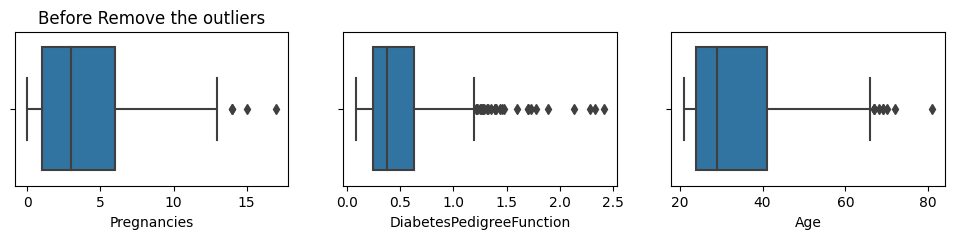

In [117]:
fig,(ax1,ax3,ax4)=plt.subplots(ncols=3 ,figsize=(12,2))

ax1.set_title("Before Remove the outliers")
sns.boxplot(data['Pregnancies'],ax=ax1)
sns.boxplot(data['Insulin'],ax=ax2)
sns.boxplot(data['DiabetesPedigreeFunction'],ax=ax3)
sns.boxplot(data['Age'],ax=ax4)



C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWar

<AxesSubplot:xlabel='Age'>

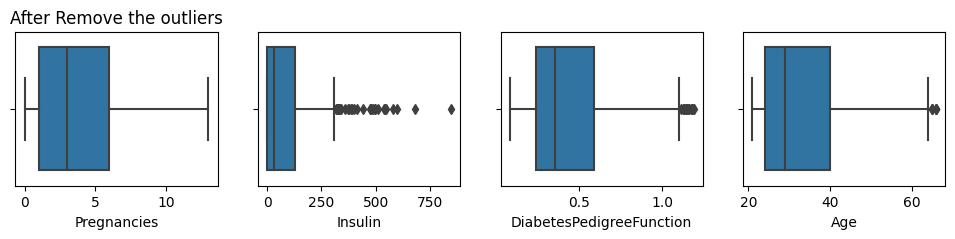

In [118]:
fig,(ax5,ax6,ax7,ax8)=plt.subplots(ncols=4 ,figsize=(12,2))
ax5.set_title("After Remove the outliers")

sns.boxplot(new_data3['Pregnancies'],ax=ax5)
sns.boxplot(new_data3['Insulin'],ax=ax6)
sns.boxplot(new_data3['DiabetesPedigreeFunction'],ax=ax7)
sns.boxplot(new_data3['Age'],ax=ax8)

In [119]:
## Again Working on Outliers

In [120]:
data.columns

Index(['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')

In [121]:
# Finding the boundary values
print("Highest allowed",new_data3['Insulin'].mean() + 3*new_data3['Insulin'].std())
print("Lowest allowed",new_data3['Insulin'].mean() - 3*new_data3['Insulin'].std())

print("Highest allowed",new_data3['DiabetesPedigreeFunction'].mean() + 3*new_data3['DiabetesPedigreeFunction'].std())
print("Lowest allowed",new_data3['DiabetesPedigreeFunction'].mean() - 3*new_data3['DiabetesPedigreeFunction'].std())

print("Highest allowed",new_data3['Age'].mean() + 3*new_data3['Age'].std())
print("Lowest allowed",new_data3['Age'].mean() - 3*new_data3['Age'].std())

Highest allowed 418.9304026308362
Lowest allowed -260.8091905096241
Highest allowed 1.1785978259621768
Lowest allowed -0.3210055394607995
Highest allowed 66.08001121913573
Lowest allowed -0.6585236158299352


In [122]:
new_data4 = new_data3[(new_data3['Insulin'] < 298.4853910202818) & (new_data3['Insulin'] > -174.36435355630485)]
new_data5 = new_data3[(new_data3['DiabetesPedigreeFunction'] < 1.176417884149868) & (new_data3['DiabetesPedigreeFunction'] > -0.3231354634005887)]
new_data6 = new_data5[(new_data5['Age'] < 65.68467275365333) & (new_data5['Age'] > -0.4598888919818691)]


C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

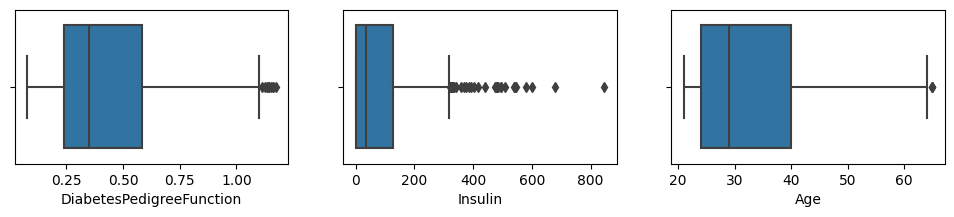

In [123]:
fig,(ax7,ax6,ax8)=plt.subplots(ncols=3 ,figsize=(12,2))
ax5.set_title("After Remove the outliers")

sns.boxplot(new_data6['Insulin'],ax=ax6)
sns.boxplot(new_data6['DiabetesPedigreeFunction'],ax=ax7)
sns.boxplot(new_data6['Age'],ax=ax8)

In [124]:
new_data_cap = new_data6.copy()

new_data_cap['Insulin'] = np.where(
    new_data_cap['Insulin'] > upper_limit_Insulin,
    upper_limit_Insulin,
    np.where(
        new_data_cap['Insulin'] < lower_limit_Insulin,
        lower_limit_Insulin,
        new_data_cap['Insulin']
    )
)
new_data_cap['DiabetesPedigreeFunction'] = np.where(
    new_data_cap['DiabetesPedigreeFunction'] > upper_limit_DiabetesPedigreeFunction,
    upper_limit_DiabetesPedigreeFunction,
    np.where(
        new_data_cap['DiabetesPedigreeFunction'] < lower_limit_DiabetesPedigreeFunction,
        lower_limit_DiabetesPedigreeFunction,
        new_data_cap['DiabetesPedigreeFunction']
    )
)
new_data_cap['Age'] = np.where(
    new_data_cap['Age'] > upper_limit_Age,
    upper_limit_Age,
    np.where(
        new_data_cap['Age'] < lower_limit_Age,
        lower_limit_Age,
        new_data_cap['Age']
    )
)

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

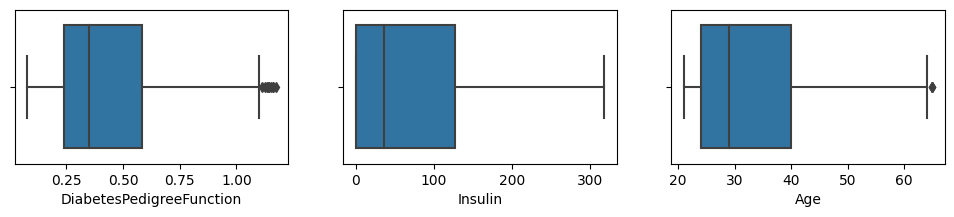

In [125]:
fig,(ax7,ax6,ax8)=plt.subplots(ncols=3 ,figsize=(12,2))
ax5.set_title("After Remove the outliers")

sns.boxplot(new_data_cap['Insulin'],ax=ax6)
sns.boxplot(new_data_cap['DiabetesPedigreeFunction'],ax=ax7)
sns.boxplot(new_data_cap['Age'],ax=ax8)

## Now standardization the Data

In [126]:
X=new_data6.drop('Outcome',axis=1)
y=new_data6['Outcome']
print('X Shape',X.shape)
print('Y Shape',y.shape)

X Shape (719, 4)
Y Shape (719,)


In [127]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print('X_train',x_train.shape)
print('X_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (503, 4)
X_test (216, 4)
y_train (503,)
y_test (216,)


In [128]:
sc=StandardScaler()

sc.fit(x_train)

x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)

In [129]:
x_train_sc=pd.DataFrame(x_train_sc, columns=x_train.columns)
x_test_sc=pd.DataFrame(x_test_sc, columns=x_test.columns)

## Effect of Standardrization

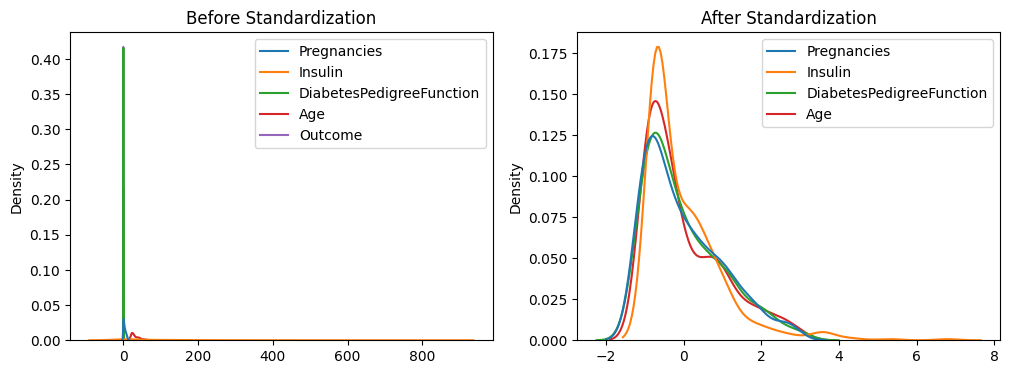

In [130]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,4))

ax1.set_title("Before Standardization")
sns.kdeplot(data=new_data3,ax=ax1)

ax2.set_title("After Standardization")
sns.kdeplot(data=x_train_sc,ax=ax2)
plt.show()

## Now working on train the Model for prediction

In [131]:
lr=LinearRegression()

lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)
y_pred

array([0.52154424, 0.37508681, 0.48768865, 0.34110109, 0.18329222,
       0.20146287, 0.2038918 , 0.76469394, 0.55305361, 0.41572801,
       0.91525526, 0.30025034, 0.23701356, 0.29448032, 0.70628342,
       0.3996252 , 0.3829162 , 0.17015589, 0.3410101 , 0.28401738,
       0.22570975, 0.30289725, 0.48204941, 0.52267368, 0.3023895 ,
       0.3397218 , 0.34191222, 0.14196139, 0.13751751, 0.2202147 ,
       0.3030478 , 0.92456551, 0.42787507, 0.44410254, 0.4004211 ,
       0.68195985, 0.22880658, 0.28234168, 0.33231498, 0.36095819,
       0.29473668, 0.37504051, 0.38447148, 0.29618913, 0.18232253,
       0.36626534, 0.55218934, 0.38660598, 0.1389916 , 0.17478744,
       0.72858197, 0.68713764, 0.40241048, 0.30742251, 0.28246845,
       0.08925851, 0.39553369, 0.4533447 , 0.36675078, 0.33567748,
       0.18285264, 0.28295744, 0.18438896, 0.52018009, 0.1704729 ,
       0.39293875, 0.78724428, 0.30952941, 0.33726104, 0.11717882,
       0.2125924 , 0.28840712, 0.3823708 , 0.56173607, 0.28303

In [132]:
print("Mean Absolute Error (MAE)",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE)",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

Mean Absolute Error (MAE) 0.39428989432761524
Mean Squared Error (MSE) 0.19211279579269563
R2 score 0.12936235060670154


## Comparing Actual Dataset Vs Prediction Dataset

In [133]:
comparing_ds=pd.DataFrame({"Actual":y_test,"Prediction":y_pred})
comparing_ds.sample(10).round(1)

,Actual,Prediction
246,0,0.4
367,0,0.1
37,1,0.5
493,1,0.7
479,0,0.6
324,0,0.1
484,1,0.3
760,0,0.3
60,0,0.1
332,1,0.3


In [134]:
comparing_ds.describe().round(1)

,Actual,Prediction
count,216.0,216.0
mean,0.3,0.4
std,0.5,0.2
min,0.0,0.1
25%,0.0,0.2
50%,0.0,0.3
75%,1.0,0.4
max,1.0,0.9


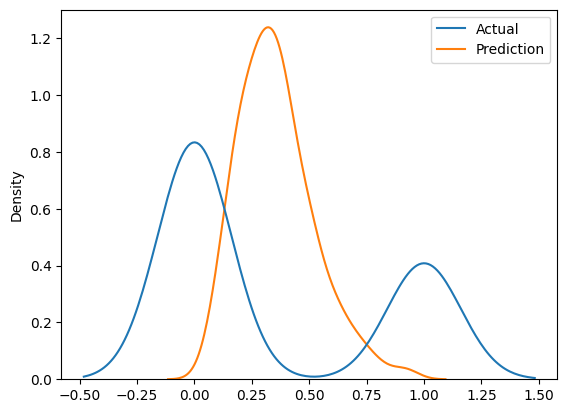

In [135]:
sns.kdeplot(data=comparing_ds)
plt.show()